In [1]:
import numpy as np
import pandas as pd

from matplotlib import animation
from matplotlib import colors
from matplotlib import pyplot as plt

from IPython.core.pylabtools import figsize
from IPython import display

%matplotlib inline
import seaborn
seaborn.set()

In [2]:
from yvolv import world
from yvolv import beast
from yvolv import simulate

reload(world)
reload(beast)
reload(simulate)

<module 'yvolv.simulate' from '/Users/Jeff/Code/yvolv/yvolv/simulate.pyc'>

In [3]:
figsize(16, 8)

def animte_evol(savepath, frames, worldsize=300, ticks_per_frame=3):
    w = world.World(worldsize, worldsize / 2, tpoints=50, bpoints=60)
    s = simulate.Simulation(w, 5000)
    fig, ax = plt.subplots()
    ax.axis("off")
    im = ax.imshow(s.image(), interpolation="none", filternorm=0, animated=True)
    plt.show()
    updater = make_updater(s, w, ax, im, ticks_per_frame=ticks_per_frame)
    anim = animation.FuncAnimation(fig, updater, frames=frames, interval=170, blit=True)
    anim.save(savepath, dpi=60, writer="imagemagick")
    return s, anim

def make_updater(s, w, ax, im, ticks_per_frame=3):
    def _update(i):
        for t in np.arange(ticks_per_frame):
            s.tick()
        emax = max(b.energy for b in s.herd)
        eavg = np.mean([b.energy for b in s.herd])
        gmax = max(b.generation for b in s.herd)
        gavg = np.mean([b.generation for b in s.herd])
        gmin = min(b.generation for b in s.herd)
        amax = max(b.age for b in s.herd)
        aavg = np.mean([b.age for b in s.herd])
        im.set_array(s.image())
        tstring =(
            "tick={} pop={}       "
            "^energy={} *energy={}       "
            "^gen={} *gen={} _gen={}       "
            "^age={} *age={}".format(
                s.world.age, len(s.herd),
                round(emax, 2), round(eavg, 2),
                gmax, round(gavg, 1), gmin,
                amax, round(aavg)))
        #ax.set_title(tstring)
        print tstring
        return im, ax
    return _update

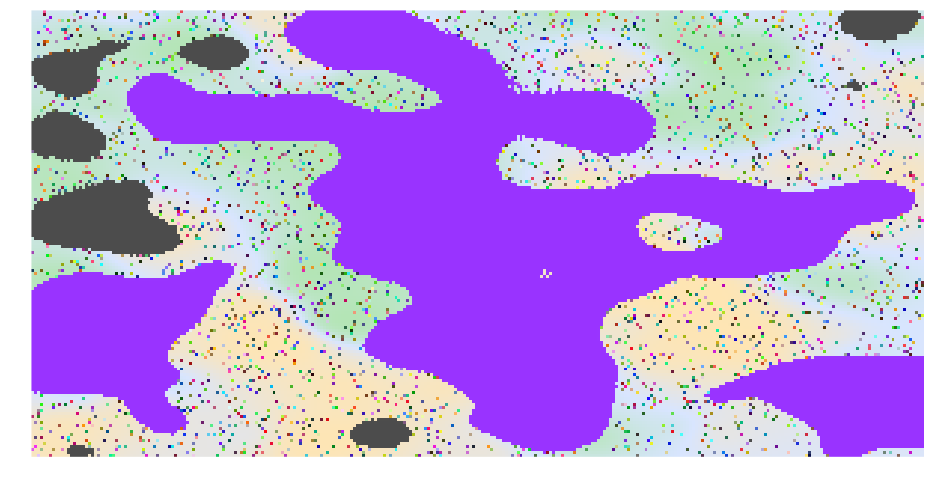

tick=20 pop=3199       ^energy=6.64 *energy=0.45       ^gen=3 *gen=0.3 _gen=0       ^age=20 *age=19.0
tick=40 pop=1644       ^energy=7.26 *energy=0.61       ^gen=3 *gen=0.1 _gen=0       ^age=40 *age=39.0
tick=60 pop=1464       ^energy=7.01 *energy=0.47       ^gen=4 *gen=0.1 _gen=0       ^age=60 *age=58.0


In [ ]:
s, anim = animte_evol("/Users/Jeff/Desktop/evol.gif", 500, worldsize=300, ticks_per_frame=20)